**Project**

CDC Action Zone

# Mplfinance

In [30]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf

In [31]:
# define asset and date
ticker_name = 'ETH-USD'
start='2021-01-01' 
end='2021-12-31'

In [32]:
raw_df = yf.download(tickers=ticker_name, start=start, end=end)

# create sma 12 and 26
raw_df['sma_12'] = raw_df['Close'].rolling(12).mean()
raw_df['sma_26'] = raw_df['Close'].rolling(26).mean()

# trend
raw_df['trend'] = raw_df['sma_12'] > raw_df['sma_26']
raw_df['trend_shift'] = raw_df['trend'].shift(1)

# signal
raw_df.loc[(raw_df.trend == True) & (raw_df.trend_shift == False),'action'] = 'buy'
raw_df.loc[(raw_df.trend == False) & (raw_df.trend_shift == True),'action'] = 'sell'

raw_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,sma_12,sma_26,trend,trend_shift,action
Date,,,,,,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358,NaN,NaN,False,NaN,NaN
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179,NaN,NaN,False,False,NaN
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368,NaN,NaN,False,False,NaN
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763,NaN,NaN,False,False,NaN
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,4094.151611,4105.023926,4013.026367,4067.328125,4067.328125,11197244172,3999.717448,4097.059983,False,False,NaN
2021-12-27,4064.746338,4126.001465,4033.492432,4037.547607,4037.547607,11424360002,4001.314026,4075.927575,False,False,NaN
2021-12-28,4037.538086,4037.538086,3769.280029,3800.893066,3800.893066,17299472803,3987.849304,4048.604145,False,False,NaN


In [33]:
# create marker signal
raw_df.loc[raw_df['action'] == 'buy', 'marker_position'] = raw_df['Low'] * 0.95
raw_df.loc[raw_df['action'] == 'sell', 'marker_position'] = raw_df['High'] * 1.05
# define color
color_marker = ['green' if x == 'buy' else 'red' for x in raw_df['action']]

addedplot = mpf.make_addplot(raw_df['marker_position'], type='scatter', markersize= 30, color=color_marker)

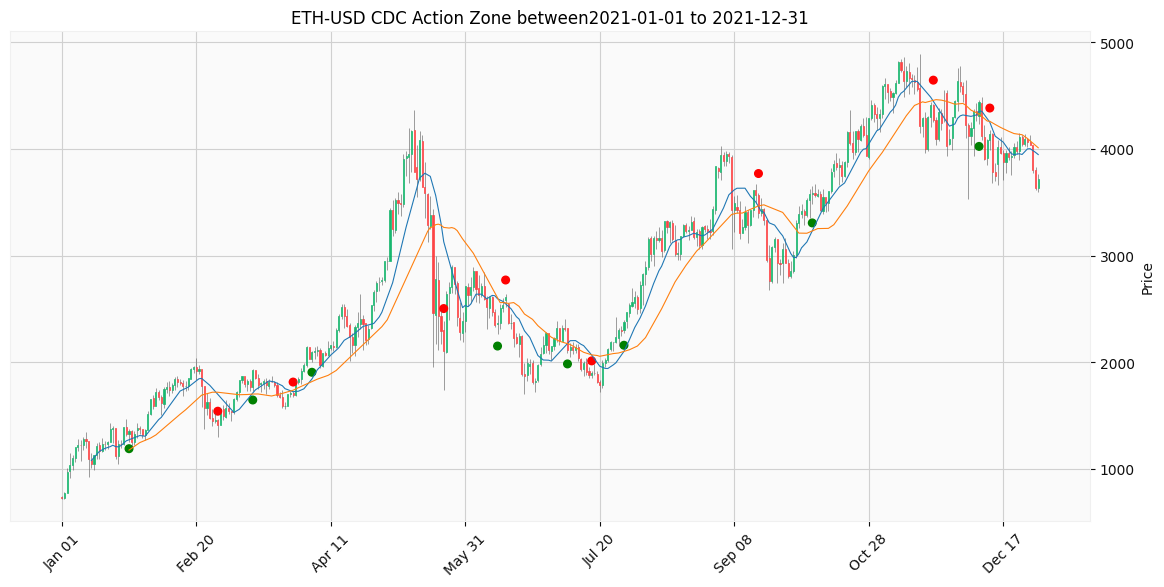

In [34]:
mpf.plot(   raw_df, style='yahoo', type='candle', mav=(12, 26), addplot=addedplot,figsize=(15, 7),
            axtitle=f'{ticker_name} CDC Action Zone between {start} to {end}')